# Text Mining from the Command Line

John Laudun  
Department of English  
University of Louisiana at Lafayette  
johnlaudun@gmail.com  
http://johnlaudun.org/  
@johnlaudun  



## Agenda

1. Getting data/texts
2. Munging
3. Examining
4. Mining

## Getting Data

### `wget`

Sometimes CLI tools, like `wget`, are more powerful than GUI tools. The key difference is that GUI tools are easier to use at first, but repetitive tasks are difficult or expensive (in terms of time). CLI tools are a little more difficult at first, but once you have an established collection of them, they are not only easier to use but just plain easier. 

**`wget`** is one of those tools. E.g.:

    % wget -r -l 1 -w 2 --limit-rate=20k https://www.cs.cmu.edu/~spok/grimmtmp/

`wget` is a CLI program that retrieves web content. To my mind, since it can act like a targeted web crawler, it is the single greatest tool available to those looking to gather data/texts. 

Let's look at what it looks like:

    % wget -r -l 1 -w 2 --limit-rate=20k https://www.cs.cmu.edu/~spok/grimmtmp/
    
* `-r` (or `--recursive`) turns on recursive retrieving (up to 5 directories deep). 
* `-l 1` (or`--level=1`) keeps the depth to 1.
* `-w 2` gives the amount of time to wait between retrievals. (Two seconds lessens the server load.)
* `--limit-rate=20k` sets the retrieval rate to 20kB/s. (This is being polite in a shared connection setting.)

Our test case comes from Zach Isenhower: http://digital.library.okstate.edu/kappler/Vol2/Toc.htm. 

As it turns out, almost all the documents in which we are interested are housed in a single directory (below), which does not like being crawled. Running `wget` returns **ERROR 403: Forbidden**. In all likelihood, this is the result of the site's administrator configuring the website to make sure that directories cannot be browsed directly.

    !wget -r -l 1 -w 2 --limit-rate=20k http://digital.library.okstate.edu/kappler/Vol2/treaties/

We need, then, to be able to access the table of contents above, get all the links listed, and then download that list into a directory (folder in GUI terms) of our choosing.

In [ ]:
import urllib.request
from bs4 import BeautifulSoup

myurl = "http://digital.library.okstate.edu/kappler/Vol2/Toc.htm"
myfilter = "http://digital.library.okstate.edu/kappler/Vol2/treaties/"
mydirectory = "/Users/jjl/Desktop/downloadedfiles/"

myconnection = urllib.request.urlopen(myurl)
myhtml = myconnection.read()
mysoup = BeautifulSoup(myhtml, "lxml")
mylinks = mysoup.find_all('a')

all_links = []
for tag in mylinks:
    link = tag.get('href',None)
    if link is not None:
        all_links.append(link)

myresults = [k for k in all_links if myfilter in k]

for result in myresults:
    remotefile = urllib.request.urlopen(result)
    localfile = open(mydirectory+result.replace(myfilter, ''),'wb')
    localfile.write(remotefile.read())
    localfile.close()
    remotefile.close()

To work with this script, all you need to do is provide three variables:

**myurl** is the page that lists the files

**myfilter** is the (remote) directory in which the files are stored

**mydirectory** is the (local) directory to which you wish to save the files. N.B.: You must create this directory ahead of time; and you must provide the absolute path from the root of your OS. The example path is from a Mac; Windows users will need something like `C:\Documents and Setting\username\path\to\folder`.

## Topic Modeling

 a very basic GUI for MALLET: https://code.google.com/archive/p/topic-modeling-tool/

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


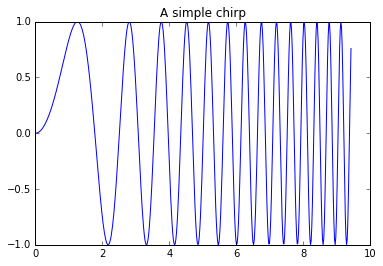

In [2]:
x = linspace(0, 3*pi, 500)
plot(x, sin(x**2))
title('A simple chirp');

## Creating a Slideshow

Creating a slideshow is as easy as:

    ipython nbconvert your_slides.ipynb --to slides

If you want to immediately serve the slides to your web browser, just add `--post serve` at the command-line:

    ipython nbconvert your_slides.ipynb --to slides --post serve